### BigData TermProject
# [세계행복보고서로 알아본 행복결정요인 분석]
#### 20192144 성지윤
#### 20182152 최한얼

[목차]
1. 서론
    
    
2. 행복 데이터 분석

    2.1. 데이터 전처리

    2.2. 한국 행복 데이터분석

        2.2.1. 2015년 ~ 2022년 한국의 행복지수 변화

        2.2.2. 현재(2022년) 한국의 행복지수

        2.2.3. 2015년 ~ 2022년 한국의 행복결정요인별 변화

        2.2.4. 현재(2022년) 한국의 행복결정요인 분석

    2.3. 한중일 행복 데이터 비교

    2.4. 행복지수 세계지도 시각화

    2.5. 2022 세계 행복지수 순위

        2.5.1. 가장 행복한 국가 top5

        2.5.2. 가장 불행한 국가 top5

        2.5.3. 행복한 국가들과 불행한 국가들 비교 분석

    2.6. 행복지수가 가장 많이 성장, 하락한 국가 분석

        2.6.1. 2015년과 2022년(현재)을 비교했을 때 행복지수가 가장 많이 성장, 하락한 나라 찾기

        2.6.2. 행복지수가 가장 많이 성장한 5개 국가 행복결정요인 분석

        2.6.3. 행복지수가 가장 많이 하락한 5개 국가 행복결정요인 분석


3. 결론

    3.1. 히트맵을 통한 행복지수와 행복결정요인별 상관관계 시각화

    3.2. 느낀점

# 1. 서론

 인간의 행복에 대한 관심이 전 세계적으로 고조되면서, 행복의 개념, 행복의 결정요인, 행복 공식, 행복 수준 등에 대한 연구가 여전히 진행되고 있다.

  경제적으로는 윤택해지고 있으나, 인간들의 행복에 대한 관심이 더 높아지는 이유는, 행복은 반드시 ‘삶의 질’ 또는 ‘생활 수준’ 과 관련이 있는 것이 아니며, 사회에 따라 행복 기준이 달리 나타나는 것으로 파악되기 때문이다.

  그렇기에 우리는 8년간의 세계 행복 보고서 데이터 분석을 통해, 전세계 국가들의 행복 지수와 행복 결정 요인간의 상관관계를 알아보겠다.

< 본 과제에 활용된 데이터들 >

세계 행복 보고서 - 캐글
https://www.kaggle.com/datasets/shivkumarganesh/world-happiness-report-20152022

국가코드가 있는 데이터셋 - 깃허브
https://github.com/plotly/datasets/blob/master/2014_world_gdp_with_codes.csv

참고 사이트 - 나무위키
https://ko.wikipedia.org/wiki/%EA%B5%AD%EA%B0%80%EB%B3%84_%EA%B5%AD%EA%B0%80_%EC%BD%94%EB%93%9C_%EB%AA%A9%EB%A1%9D

# 2. 행복 데이터 분석

## 2.1. 데이터 전처리

In [139]:
!pip install kaggle

In [140]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import shutil
import plotly.graph_objects as go
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# 색상코드
red = '#E24A33'
blue = '#348ABD'

In [141]:
# 캐글 키
os.environ['KAGGLE_USERNAME'] = 'haneolchoi'
os.environ['KAGGLE_KEY'] = '27a19496997c104d22e87f5a37e4b47d'

In [142]:
# 데이터셋 다운(세계 행복 보고서)
!kaggle datasets download -d mathurinache/world-happiness-report

world-happiness-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [143]:
# 압축해제
filename = './world-happiness-report.zip'
extract_dir = './world-happiness-report'
archive_format = 'zip'

shutil.unpack_archive(filename, extract_dir, archive_format)

In [144]:
# 2022년 세계행복보고서 데이터셋 내용 확인
filedata = pd.read_csv("./world-happiness-report/2022.csv")
df = pd.DataFrame(filedata)
df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [145]:
data = []
for i in range(2015,2023):
    filename = str(i) + '.csv'
    data.append(pd.read_csv("./world-happiness-report/"+filename))

for i in range(0, len(data)):
    print(f'{i+2015}년의 컬럼명')
    for j in range(0, len(data[i].columns)):
        print(data[i].columns[j])
    print()
    
# 각 csv파일의 컬럼명이 다른것을 알 수 있다. 
# 데이터처리를 위해 컬럼명을 통일해야한다.

2015년의 컬럼명
Country
Region
Happiness Rank
Happiness Score
Standard Error
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual

2016년의 컬럼명
Country
Region
Happiness Rank
Happiness Score
Lower Confidence Interval
Upper Confidence Interval
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual

2017년의 컬럼명
Country
Happiness.Rank
Happiness.Score
Whisker.high
Whisker.low
Economy..GDP.per.Capita.
Family
Health..Life.Expectancy.
Freedom
Generosity
Trust..Government.Corruption.
Dystopia.Residual

2018년의 컬럼명
Overall rank
Country or region
Score
GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption

2019년의 컬럼명
Overall rank
Country or region
Score
GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption

2020년의 컬럼명
Country name
Regiona

In [146]:
# 전처리 데이터를 넣기 위한 폴더 생성
# 이미 존재하면 아무것도 하지 않음
os.makedirs('data_dir', exist_ok=True)

### 행복지수: 얼마나 행복한가
### 경제성(GDP): 국내총생산을 인구 수로 나눈 값, 국민들의 평균적인 소득 수준을 나타냄
### 인간관계: 당신의 삶에 문제가 생겼을 때 당신을 위해 무슨 일이든 도와줄 수 있는 가족이나 친구가 있는가
### 건강 기대 수명: 국민들이 건강한 상태로 얼마나 오래 사느냐
### 자유: 무엇을 할지 결정할 자유를 충분이 느끼고 있는가?
### 기부: 기부를 한 적이 있는가(이 수치가 낮으면 그만큼 그 나라의 분위기가 각박하다는 뜻)
### 부패 인식 정도: 그 국가의 정부 및 기업에 부패가 만연하다고 생각하는가

In [147]:
# 컬럼을 통합하기 위한 빈 데이터프레임 생성
new_dataframe = pd.DataFrame(columns=['국가', '행복지수', '경제성(GDP)', '인간관계','건강 기대 수명', '자유', '기부', '부패 인식 정도'])

year = 2015
for i in data:    
    
    country = 0
    score = 0
    
    for j in range(0, len(i.columns)):
        if year == 2022:
            i[i.columns[j]] = i[i.columns[j]].astype(str).str.replace(',','.')
        if ('Country' in i.columns[j]):
            i[i.columns[j]] = i[i.columns[j]].str.replace(pat=r'[^\w ]', repl=r'', regex=True)   #국가의 특수문자 제거(띄어쓰기는 살리고)
            new_dataframe.loc[:,'국가'] = i.loc[:,i.columns[j]]
            country = 1
        elif ('Score' in i.columns[j] or 'Ladder score' in i.columns[j] or 'Happiness score' in i.columns[j])  and score == 0:  
            new_dataframe.loc[:,'행복지수'] = i.loc[:,i.columns[j]]
            score = 1
        elif ('support' in i.columns[j] or 'Social support' in i.columns[j] or 'Family' in i.columns[j]):  
            new_dataframe.loc[:,'인간관계'] = i.loc[:,i.columns[j]]
            score = 1
        elif 'GDP' in i.columns[j]:
            new_dataframe.loc[:,'경제성(GDP)'] = i.loc[:,i.columns[j]]
            gdp = 1
        elif ('Health' in i.columns[j]): 
            new_dataframe.loc[:,'건강 기대 수명'] = i.loc[:,i.columns[j]]
            health = 1
        elif 'Freedom' in i.columns[j]:
            new_dataframe.loc[:,'자유'] = i.loc[:,i.columns[j]]
            freedom = 1
        elif 'Generosity' in i.columns[j]:
            new_dataframe.loc[:,'기부'] = i.loc[:,i.columns[j]]
            generosity = 1
        elif ('corruption' in i.columns[j] or 'Corruption' in i.columns[j]):
            new_dataframe.loc[:,'부패 인식 정도'] = i.loc[:,i.columns[j]]
            corruption = 1
   
    new_dataframe = new_dataframe.dropna(axis=0)   # 결측값이 있는 행 지우기 (NaN)
    new_dataframe.to_csv('./data_dir/data' + str(year) + '.csv', index=False, encoding="cp949")
    year += 1

In [148]:
# 2022 데이터 출력
data_2022 = pd.read_csv("./data_dir/data2022.csv", encoding='cp949')
data_2022 = data_2022.dropna(axis=0)    # 결측값이 있는 행 지우기 (NaN)
data_2022

,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
140,Botswana,3.471,1.503,0.815,0.280,0.571,0.012,0.102
141,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544
142,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
143,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


## 2.2. 한국 행복 데이터분석

### 2.2.1. 2015년 ~ 2022년 한국의 행복지수 변화

In [149]:
# 2015년 ~ 2022년 한국 데이터
total_koreaData = pd.DataFrame(columns=['국가', '행복지수', '경제성(GDP)', '인간관계','건강 기대 수명', '자유', '기부', '부패 인식 정도'])
for i in range(2015, 2023):
    readCSV = pd.read_csv("./data_dir/data"+str(i)+".csv", encoding='cp949')
    readCSV=readCSV.dropna(axis=0)    # 결측값이 있는 행 지우기 (NaN)
    readCSV.index = readCSV.index + 1    # 인덱스를 1부터(1위) 시작
    koreaData = readCSV.loc[(readCSV['국가'] == 'South Korea')]
    total_koreaData = pd.concat([total_koreaData, koreaData], ignore_index = True)
    total_koreaData.index += 2015
total_koreaData

,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도
2015,South Korea,5.984,1.24461,0.95774,0.96538,0.33208,0.18557,0.07857
2016,South Korea,5.835,1.35948,0.72194,0.88645,0.25168,0.18824,0.07716
2017,South Korea,5.838,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283
2018,South Korea,5.875,1.266,1.204,0.955,0.244,0.175,0.051
2019,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056
2020,South Korea,5.8724,1.245301,1.133561,1.022543,0.259356,0.170304,0.094596
2021,South Korea,5.845,1.403,0.758,0.801,0.353,0.134,0.135
2022,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176


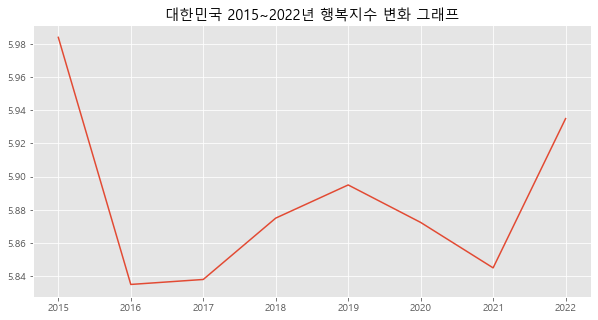

In [150]:
# 2015년 ~ 2022년 한국의 행복지수 변화 그래프
x = total_koreaData.index
y = total_koreaData['행복지수']

plt.figure(figsize=(10, 5))
plt.title('대한민국 2015~2022년 행복지수 변화 그래프')
plt.plot(x, y)
plt.show()

### 2.2.2. 현재(2022년) 한국의 행복지수

In [151]:
target_data = pd.read_csv("./data_dir/data2022.csv", encoding='cp949')
target_data=target_data.dropna(axis=0)    # 결측값이 있는 행 지우기 (NaN)
target_data.index = target_data.index + 1    # 인덱스를 1부터(1위) 시작

korea_rank = target_data.loc[(target_data['국가'] == 'South Korea')]
print(f'2022년 {len(target_data)}개의 국가 중 한국의 행복지수 순위는 {korea_rank.index[0]}위')
korea_rank

2022년 145개의 국가 중 한국의 행복지수 순위는 58위


,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도
58,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176


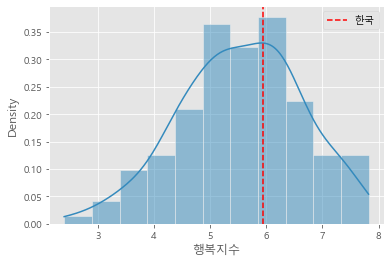

In [152]:
plt.style.use('ggplot')
# 그래프에 한글 출력시 폰트 변경 (기본폰트 : sans-serif)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스(-)폰트 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False
sns.histplot(target_data['행복지수'], kde=True, stat="density")
plt.axvline(list(korea_rank['행복지수']),0, 1, color='r', linestyle='--', label='한국')

# 한국의 행복지수가 수 많은 국가의 행복지수들 중에서 어디에 분포되어 있는지 알 수 있다
plt.legend()

### 2.2.3. 2015년 ~ 2022년 한국의 행복결정요인별 변화

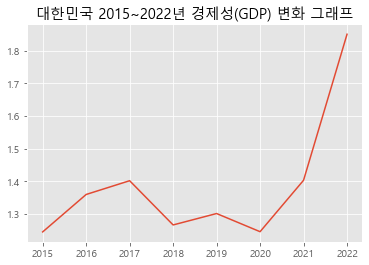

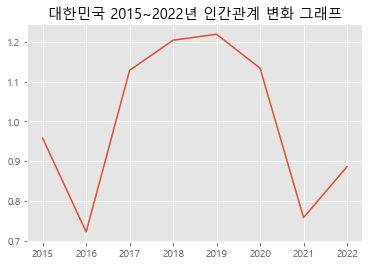

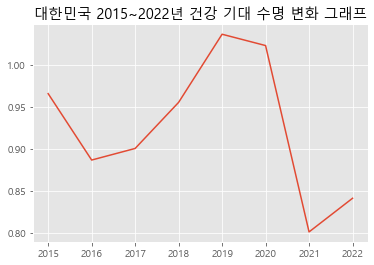

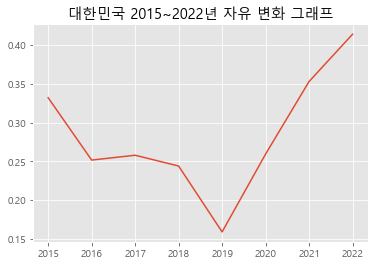

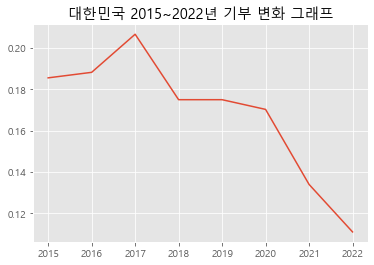

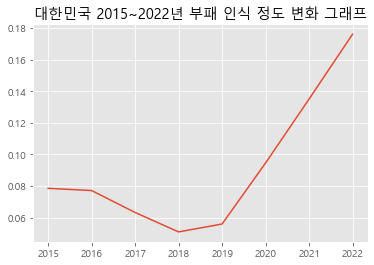

In [153]:
# 2015년 ~ 2022년 한국의 행복결정요인별 변화 그래프
for i in total_koreaData.columns[2:]:
    x = total_koreaData.index
    y = total_koreaData[i]
    plt.title('대한민국 2015~2022년 '+ i +' 변화 그래프')
    plt.plot(x, y)
# plt.figure(figsize=(10, 5))
    plt.show()

## 2.2.4. 현재(2022년) 한국의 행복결정요인 분석

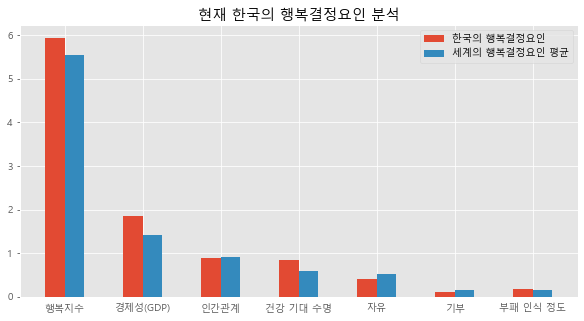

In [154]:
# 한국의 행복결정요인들과 세계의 행복결정요인들의 평균을 비교할 수 있는 그래프
index = np.arange(len(list(korea_rank.columns)[1:]))
bar_width = 0.25

avg_data = target_data.mean(numeric_only=True)

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('현재 한국의 행복결정요인 분석')

kor = plt.bar(index, list(korea_rank.values[0])[1:], label='한국의 행복결정요인', width = bar_width)
world = plt.bar(index + bar_width, list(avg_data), label='세계의 행복결정요인 평균', width = bar_width)

plt.xticks(index+bar_width/2, list(korea_rank.columns)[1:])
plt.tick_params(axis='x', bottom=False)
plt.legend()
plt.show()

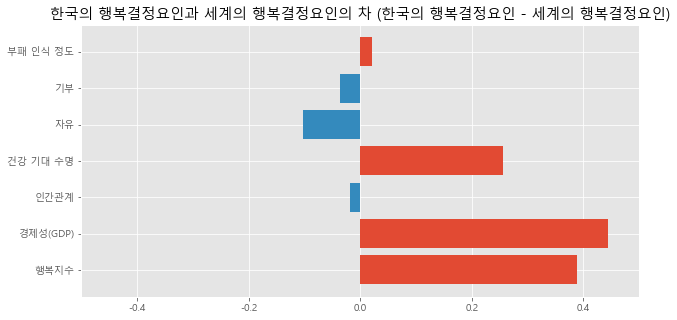

In [155]:
result = np.array(korea_rank.values[0])[1:] - np.array(avg_data)

plt.figure(figsize=(10, 5))
plt.title('한국의 행복결정요인과 세계의 행복결정요인의 차 (한국의 행복결정요인 - 세계의 행복결정요인)')
compare_data = pd.DataFrame()

plt.barh(list(korea_rank.columns)[1:], result, color=list(map(lambda x : red if x > 0 else blue, result)))
plt.xlim(-0.5,0.5)
plt.show()

# 양의 값들은 한국이 세계보다 더 높다는 의미
# 음의 값들은 한국이 세계보다 더 낮다는 의미

## 2.3. 한중일 행복 데이터 비교

In [156]:
# 한중일 데이터
kcj_data = target_data[target_data['국가'].str.contains('South Korea|^China|Japan')]
kcj_data

,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도
53,Japan,6.039,1.835,1.089,0.866,0.537,0.007,0.218
58,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176
71,China,5.585,1.508,0.958,0.705,0.656,0.099,0.142


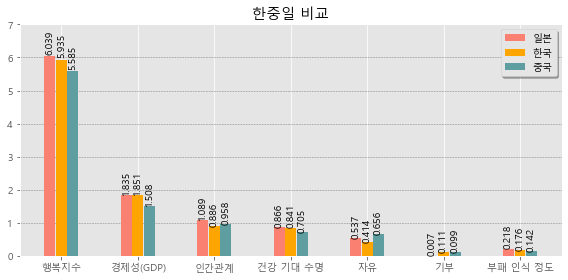

In [157]:
# 하나당 3개의 막대그래프를 그리기 위한 함수
def compute_pos(xticks, width, i, countries):
    index = np.arange(len(xticks))
    n = len(countries)
    correction = i-0.5*(n-1)
    return index + width*correction

# bar 세부 설정
def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom')
        
# 그래프에 나타낼 데이터 입력
countries = ['일본', '한국', '중국']
xticks = ['행복지수', '경제성(GDP)', '인간관계', '건강 기대 수명', '자유', '기부', '부패 인식 정도']
data = {'일본':list(kcj_data.values[0][1:]),
        '한국':list(kcj_data.values[1][1:]),
        '중국':list(kcj_data.values[2][1:])}
    
# 그래프의 figure 및 axis 설정
fig, ax = plt.subplots(1,1,figsize=(8,4)) # 1x1 figure matrix 생성, 가로x세로 크기지정
colors = ['salmon', 'orange', 'cadetblue', 'skyblue']
width = 0.15

# 그래프 그리기
for i, country in enumerate(countries):
    pos = compute_pos(xticks, width, i, countries)
    bar = ax.bar(pos, data[country], width=width*0.95, label=country, color=colors[i])
    present_height(ax, bar) # bar높이 출력
    
# 제목 설정
plt.title('한중일 비교')
    
# x축 세부설정
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, fontsize=10)	

# y축 세부설정
ax.set_ylim([0,7])
ax.yaxis.set_tick_params(labelsize=10)

# 범례 나타내기
ax.legend(loc='upper right', shadow=True, ncol=1)

# 보조선(눈금선) 나타내기
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

# 출력하기
plt.tight_layout() # 겹치지 않게
plt.show()

## 2.4. 행복지수 세계지도 시각화

In [158]:
!pip install plotly

In [159]:
# 세계지도를 그리는 라이브러리를 사용하기 위해 국가코드가 있는 데이터셋 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
# 내용 확인
df

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
...,...,...,...
217,Virgin Islands,5.08,VGB
218,West Bank,6.64,WBG
219,Yemen,45.45,YEM
220,Zambia,25.61,ZMB


In [160]:
data_2022 = data_2022.sort_values('국가', ascending=True)

In [161]:
# 국가 코드 맵핑을 위해 data_2022에 존재하는 국가 찾기
map_code = []

for i in list(data_2022['국가']):
    try:
        map_code.append(list(df.loc[df['COUNTRY'] == i,'CODE'])[0])
    except IndexError: ##인덱스 벗어나는 에러를 잡았을 경우에 대해서만!
        map_code.append(np.nan)

In [162]:
# 국가 코드 열 추가
data_2022['CODE'] = map_code
data_2022

,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도,CODE
144,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005,AFG
88,Albania,5.199,1.439,0.646,0.719,0.511,0.138,0.028,ALB
94,Algeria,5.122,1.363,0.970,0.643,0.146,0.106,0.150,DZA
55,Argentina,5.967,1.592,1.102,0.662,0.555,0.081,0.085,ARG
80,Armenia,5.399,1.434,0.820,0.668,0.558,0.054,0.210,ARM
...,...,...,...,...,...,...,...,...,...
106,Venezuela,4.925,0.000,0.968,0.578,0.283,0.225,0.082,VEN
75,Vietnam,5.485,1.252,0.932,0.611,0.707,0.143,0.105,VNM
130,Yemen,4.197,0.691,1.043,0.384,0.330,0.090,0.098,YEM
135,Zambia,3.760,0.930,0.577,0.306,0.525,0.203,0.083,ZMB


In [163]:
# 매핑 실패한 국가들 출력 
data_2022[data_2022['CODE'].isnull()]

,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도,CODE
97,Congo,5.075,0.950,0.405,0.355,0.431,0.130,0.146,NaN
17,Czechia,6.920,1.815,1.260,0.715,0.660,0.158,0.048,NaN
123,Eswatini Kingdom of,4.396,1.274,0.786,0.197,0.259,0.038,0.154,NaN
91,Gambia,5.164,0.785,0.621,0.369,0.367,0.388,0.103,NaN
79,Hong Kong SAR of China,5.425,1.957,0.954,0.942,0.400,0.147,0.383,NaN
86,Ivory Coast,5.235,1.094,0.442,0.322,0.451,0.149,0.124,NaN
124,Myanmar,4.394,1.038,0.829,0.491,0.513,0.452,0.194,NaN
77,North Cyprus,5.467,1.815,0.888,0.819,0.523,0.130,0.213,NaN
87,North Macedonia,5.199,1.505,0.863,0.637,0.488,0.215,0.031,NaN
120,Palestinian Territories,4.483,1.148,0.957,0.521,0.336,0.073,0.079,NaN


In [164]:
# NULL이 담긴 코드값 수작업으로 채워줌
# https://ko.wikipedia.org/wiki/%EA%B5%AD%EA%B0%80%EB%B3%84_%EA%B5%AD%EA%B0%80_%EC%BD%94%EB%93%9C_%EB%AA%A9%EB%A1%9D
data_2022.loc[data_2022['국가']=='South Korea', 'CODE'] = 'KOR'
data_2022.loc[data_2022['국가']=='Bahamas', 'CODE'] = 'BHM'
data_2022.loc[data_2022['국가']=='Congo', 'CODE'] = 'COG'
data_2022.loc[data_2022['국가']=='Gambia', 'CODE'] = 'GMB'
data_2022.loc[data_2022['국가']=='Hong Kong SAR of China', 'CODE'] = 'HKG'
data_2022.loc[data_2022['국가']=='Ivory Coast', 'CODE'] = 'CIV'
data_2022.loc[data_2022['국가']=='Czechia', 'CODE'] = 'CZE'
data_2022.loc[data_2022['국가']=='Eswatini Kingdom of', 'CODE'] = 'SWZ'
data_2022.loc[data_2022['국가']=='Czechia', 'CODE'] = 'CZE'
data_2022.loc[data_2022['국가']=='Myanmar', 'CODE'] = 'MMR'
data_2022.loc[data_2022['국가']=='North Cyprus', 'CODE'] = 'CYP'
data_2022.loc[data_2022['국가']=='North Macedonia', 'CODE'] = 'MKD'
data_2022.loc[data_2022['국가']=='Palestinian Territories', 'CODE'] = 'PSE'
data_2022.loc[data_2022['국가']=='Taiwan Province of China', 'CODE'] = 'TWN'

In [165]:
data_2022

,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도,CODE
144,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005,AFG
88,Albania,5.199,1.439,0.646,0.719,0.511,0.138,0.028,ALB
94,Algeria,5.122,1.363,0.970,0.643,0.146,0.106,0.150,DZA
55,Argentina,5.967,1.592,1.102,0.662,0.555,0.081,0.085,ARG
80,Armenia,5.399,1.434,0.820,0.668,0.558,0.054,0.210,ARM
...,...,...,...,...,...,...,...,...,...
106,Venezuela,4.925,0.000,0.968,0.578,0.283,0.225,0.082,VEN
75,Vietnam,5.485,1.252,0.932,0.611,0.707,0.143,0.105,VNM
130,Yemen,4.197,0.691,1.043,0.384,0.330,0.090,0.098,YEM
135,Zambia,3.760,0.930,0.577,0.306,0.525,0.203,0.083,ZMB


In [166]:
# 세계 지도 그리기
fig = go.Figure(data=go.Choropleth(
    locations = data_2022['CODE'],
    z = data_2022['행복지수'],
    text = data_2022['국가'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '0.',
    colorbar_title = '행복지수',
))

# 제목, 아래에 문구 표시
fig.update_layout(
    title_text='2022년 행복지수 세계지도 시각화',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://ko.wikipedia.org/wiki/%EA%B5%AD%EA%B0%80%EB%B3%84_%EA%B5%AD%EA%B0%80_%EC%BD%94%EB%93%9C_%EB%AA%A9%EB%A1%9D">\
            국가코드</a>',
        showarrow = False
    )]
)

# 진한 파란색일수록 행복지수가 높은 국가
fig.show()

## 2.5. 2022 세계 행복지수 순위

### 2.5.1. 가장 행복한 국가 top5

In [167]:
high = target_data.head()
high.columns.names = ["순위"]
high

순위,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도
1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
4,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
5,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419


### 2.5.2. 가장 불행한 국가 top5

In [168]:
low = target_data.tail()
low.columns.names = ["순위"]
low

순위,국가,행복지수,경제성(GDP),인간관계,건강 기대 수명,자유,기부,부패 인식 정도
141,Botswana,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005


### 2.5.3. 행복한 국가들과 불행한 국가들 비교 분석

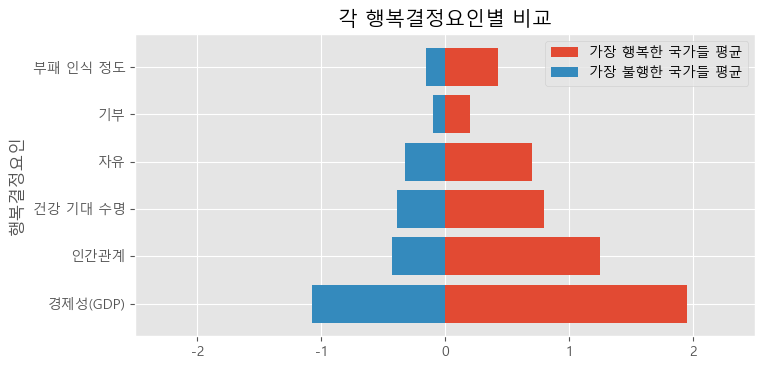

In [169]:
# 가장 행복한 국가 top5 각 행복결정요인별 평균 구하기
high_mean = high.mean(numeric_only=True)
high_list = list(high_mean)

# 가장 불행한 국가 top5 각 행복결정요인별 평균 구하기
low_mean = low.mean(numeric_only=True)
low_list = list(low_mean)

# 가장 불행한 국가들 평균낸 리스트를 모두 음수로 변환(왼쪽으로 정렬하기 위해)
negative_low_list = []
for data in low_list:
    negative_low_list.append(-data)

# 각 행복결정요인별 비교 막대그래프 생성
happiness = ["행복지수", "경제성(GDP)", "인간관계", "건강 기대 수명", "자유", "기부", "부패 인식 정도"]
plt.style.use('ggplot')
plt.figure(figsize=(8,4), dpi=100)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title("각 행복결정요인별 비교")
plt.barh(happiness[1:], high_list[1:], label='가장 행복한 국가들 평균')
plt.barh(happiness[1:], negative_low_list[1:], label='가장 불행한 국가들 평균')
plt.xlim(-2.5, 2.5)
plt.ylabel('행복결정요인')
plt.legend()
plt.show()

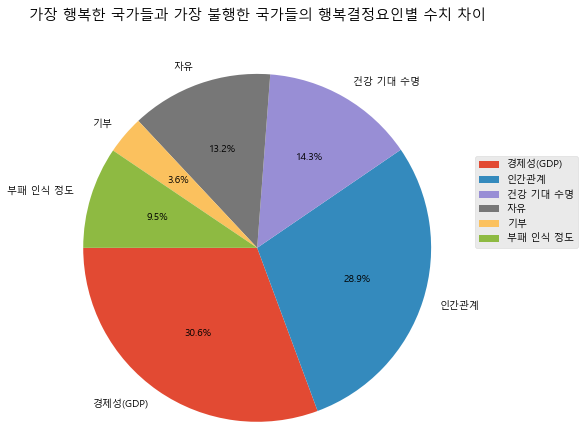

In [170]:
# 가장 행복한 국가들 평균 - 가장 불행한 국가들 평균
compare_data = []

for i in range(len(high_list)):
    compare_data.append(high_list[i] - low_list[i])

# 파이 차트(원그래프) 생성
plt.pie(compare_data[1:], labels=happiness[1:], autopct='%.1f%%', startangle=180, radius=2)
plt.title("가장 행복한 국가들과 가장 불행한 국가들의 행복결정요인별 수치 차이", pad=120)
plt.legend(loc=(1.5, 0.5))
plt.show()

## 2.6. 행복지수가 가장 많이 성장, 하락한 국가 분석

### 2.6.1. 2015년과 2022년(현재)을 비교했을 때 행복지수가 가장 많이 성장, 하락한 나라 찾기

In [171]:
# 2015년에 존재한 국가들 데이터
data_2015 = pd.read_csv("./data_dir/data2015.csv", encoding='cp949')
data_2015=data_2015.dropna(axis=0)    # 결측값이 있는 행 지우기 (NaN)
data_2015.index = data_2015.index + 1    # 인덱스를 1부터(1위) 시작

# 2022년에 존재하는 국가들 데이터
data_2022 = pd.read_csv("./data_dir/data2022.csv", encoding='cp949')
data_2022=data_2022.dropna(axis=0)    # 결측값이 있는 행 지우기 (NaN)
data_2022.index = data_2022.index + 1    # 인덱스를 1부터(1위) 시작

In [172]:
# 2022년에 존재하는 국가들 출력
list(data_2022['국가'])

['Finland',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Netherlands',
 'Luxembourg',
 'Sweden',
 'Norway',
 'Israel',
 'New Zealand',
 'Austria',
 'Australia',
 'Ireland',
 'Germany',
 'Canada',
 'United States',
 'United Kingdom',
 'Czechia',
 'Belgium',
 'Bahrain',
 'Slovenia',
 'Costa Rica',
 'United Arab Emirates',
 'Saudi Arabia',
 'Taiwan Province of China',
 'Singapore',
 'Romania',
 'Spain',
 'Uruguay',
 'Italy',
 'Kosovo',
 'Malta',
 'Lithuania',
 'Slovakia',
 'Estonia',
 'Panama',
 'Brazil',
 'Guatemala',
 'Kazakhstan',
 'Cyprus',
 'Latvia',
 'Serbia',
 'Chile',
 'Nicaragua',
 'Mexico',
 'Croatia',
 'Poland',
 'El Salvador',
 'Kuwait',
 'Hungary',
 'Mauritius',
 'Uzbekistan',
 'Japan',
 'Honduras',
 'Portugal',
 'Argentina',
 'Greece',
 'South Korea',
 'Philippines',
 'Thailand',
 'Moldova',
 'Jamaica',
 'Kyrgyzstan',
 'Belarus',
 'Colombia',
 'Bosnia and Herzegovina',
 'Mongolia',
 'Dominican Republic',
 'Malaysia',
 'Bolivia',
 'China',
 'Paraguay',
 'Peru',
 'Montenegro',
 '

In [173]:
# 2015년 데이터와 2022년 데이터 모두 존재하는 국가
country_2022 = list(data_2022['국가'])
country_2015 = list(data_2015['국가'])
common_country = []
for i in country_2022:
    if i in country_2015:
        common_country.append(i)

print(common_country)

['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand', 'Austria', 'Australia', 'Ireland', 'Germany', 'Canada', 'United States', 'United Kingdom', 'Belgium', 'Bahrain', 'Slovenia', 'Costa Rica', 'United Arab Emirates', 'Saudi Arabia', 'Singapore', 'Romania', 'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania', 'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua', 'Mexico', 'Croatia', 'Poland', 'El Salvador', 'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea', 'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyzstan', 'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia', 'Dominican Republic', 'Malaysia', 'Bolivia', 'China', 'Paraguay', 'Peru', 'Montenegro', 'Ecuador', 'Vietnam', 'Turkmenistan', 'North Cyprus', 'Russia', 'Armenia', 'Tajikistan', 'Nepal', 'Bulgaria', 'Lib

In [174]:
# 2022년 데이터값 - 2015년 데이터값(얼마나 성장했는지) 결과보기
ordered_2015 = pd.DataFrame(columns=['국가', '행복지수', '경제성(GDP)', '인간관계','건강 기대 수명', '자유', '기부', '부패 인식 정도'])
ordered_2022 = pd.DataFrame(columns=['국가', '행복지수', '경제성(GDP)', '인간관계','건강 기대 수명', '자유', '기부', '부패 인식 정도'])

for i in common_country:
    ordered_2015 = pd.concat([ordered_2015, data_2015.loc[data_2015['국가'] == i]], ignore_index = True)
    ordered_2022 = pd.concat([ordered_2022, data_2022.loc[data_2022['국가'] == i]], ignore_index = True)

compare_2015_2022 = ordered_2022.iloc[:,1:] - ordered_2015.iloc[:,1:]    # 2022년에서 2015년의 데이터를 뺀 값

compare_2015_2022_rate = (compare_2015_2022.astype(float) / ordered_2015.iloc[:,1:].astype(float)) * 100
compare_2015_2022_rate.index = ordered_2022['국가']

compare_2015_2022_rate = compare_2015_2022_rate.sort_values('행복지수', ascending=False)
compare_2015_2022_rate.columns = ['행복지수(%)', '경제성(GDP)(%)', '인간관계(%)','건강 기대 수명(%)', '자유(%)', '기부(%)', '부패 인식 정도(%)']

compare_2015_2022_rate

,행복지수(%),경제성(GDP)(%),인간관계(%),건강 기대 수명(%),자유(%),기부(%),부패 인식 정도(%)
국가,,,,,,,
Togo,44.839732,269.465210,130.082172,26.568927,-19.896853,4.310293,23.008107
Ivory Coast,43.228454,135.096918,-42.683006,112.051366,-3.768190,-26.109596,-30.811293
Benin,38.413174,225.135182,-81.913751,4.982764,-1.135191,-30.449069,187.141074
Guinea,33.780088,386.880634,21.785906,14.540381,-11.464546,-25.323656,-4.440234
Burkina Faso,30.192361,201.797614,-33.676105,17.972350,-3.273998,-14.470962,-1.807980
...,...,...,...,...,...,...,...
Venezuela,-27.679883,-100.000000,-22.927482,-19.780159,-34.044933,285.208012,-25.919234
Lesotho,-28.297264,123.465175,-18.542213,-100.000000,31.897881,-53.624603,-85.604607
Afghanistan,-32.755245,137.008317,-100.000000,-4.730509,-100.000000,-75.623117,-94.855438


In [175]:
# 가장 많이 행복지수가 성장한 국가
compare_2015_2022_rate.head(1)

,행복지수(%),경제성(GDP)(%),인간관계(%),건강 기대 수명(%),자유(%),기부(%),부패 인식 정도(%)
국가,,,,,,,
Togo,44.839732,269.46521,130.082172,26.568927,-19.896853,4.310293,23.008107


In [176]:
# 가장 많이 행복지수가 하락한 국가
compare_2015_2022_rate.tail(1)

,행복지수(%),경제성(GDP)(%),인간관계(%),건강 기대 수명(%),자유(%),기부(%),부패 인식 정도(%)
국가,,,,,,,
Lebanon,-38.933664,35.720136,-37.750778,-24.833526,-69.630853,-62.478265,-25.796595


### 2.6.2. 행복지수가 가장 많이 성장한 5개 국가 행복결정요인 분석

In [177]:
compare_top5 = compare_2015_2022_rate.head()
compare_top5
# 행복지수가 가장 많이 성장한 5개 국가를 보아 경제성(GDP)가 가장 많이 성장했다
# Ivory Coast는 경제성(GDP)와 건강 기대 수명이 비슷한 비율로 올랐다.

,행복지수(%),경제성(GDP)(%),인간관계(%),건강 기대 수명(%),자유(%),기부(%),부패 인식 정도(%)
국가,,,,,,,
Togo,44.839732,269.465210,130.082172,26.568927,-19.896853,4.310293,23.008107
Ivory Coast,43.228454,135.096918,-42.683006,112.051366,-3.768190,-26.109596,-30.811293
Benin,38.413174,225.135182,-81.913751,4.982764,-1.135191,-30.449069,187.141074
Guinea,33.780088,386.880634,21.785906,14.540381,-11.464546,-25.323656,-4.440234
Burkina Faso,30.192361,201.797614,-33.676105,17.972350,-3.273998,-14.470962,-1.807980


In [178]:
avg_compare_top5 = compare_top5.mean().to_frame(name='행복지수가 가장 많이 성장한 5개 국가의 행복결정요인별 평균')
avg_compare_top5

# 평균만 놓고보니 확실히 경제성(GDP)가 가장 많은 비중을 차지한다.

,행복지수가 가장 많이 성장한 5개 국가의 행복결정요인별 평균
행복지수(%),38.090762
경제성(GDP)(%),243.675112
인간관계(%),-1.280957
건강 기대 수명(%),35.223158
자유(%),-7.907756
기부(%),-18.408598
부패 인식 정도(%),34.617935


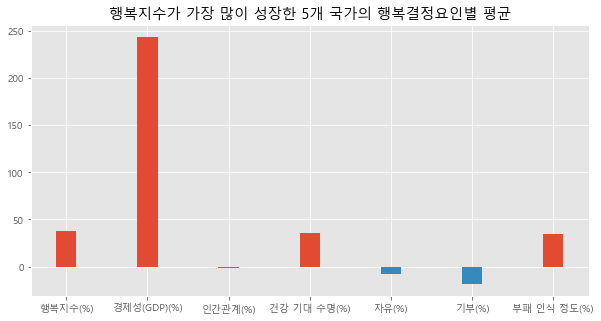

In [179]:
# 행복지수가 가장 많이 성장한 5개 국가의 행복결정요인별 평균 시각화
plt.figure(figsize=(10, 5))
plt.title(avg_compare_top5.columns[0])

plt.bar(list(avg_compare_top5.index), list(avg_compare_top5[avg_compare_top5.columns[0]]), width = bar_width, color=list(map(lambda x : red if x > 0 else blue, list(avg_compare_top5[avg_compare_top5.columns[0]]))))

plt.show()

### 2.6.3. 행복지수가 가장 많이 하락한 5개 국가 행복결정요인 분석

In [180]:
compare_bottom5 = compare_2015_2022_rate.tail(5)
compare_bottom5
# 행복지수가 가장 많이 하락한 5개 국가를 보아 행복지수가 하락한 원인은 국가별로 다양했다.

,행복지수(%),경제성(GDP)(%),인간관계(%),건강 기대 수명(%),자유(%),기부(%),부패 인식 정도(%)
국가,,,,,,,
Venezuela,-27.679883,-100.000000,-22.927482,-19.780159,-34.044933,285.208012,-25.919234
Lesotho,-28.297264,123.465175,-18.542213,-100.000000,31.897881,-53.624603,-85.604607
Afghanistan,-32.755245,137.008317,-100.000000,-4.730509,-100.000000,-75.623117,-94.855438
Zimbabwe,-35.032538,249.446494,-33.188737,-19.342793,27.218592,-44.172328,29.966580
Lebanon,-38.933664,35.720136,-37.750778,-24.833526,-69.630853,-62.478265,-25.796595


In [181]:
avg_compare_bottom5= compare_bottom5.mean().to_frame(name='행복지수가 가장 많이 떨어진 5개 나라의 요소별 평균')
avg_compare_bottom5

# 평균적으로는 인간관계가 가장 많이 하락했다.

,행복지수가 가장 많이 떨어진 5개 나라의 요소별 평균
행복지수(%),-32.539719
경제성(GDP)(%),89.128024
인간관계(%),-42.481842
건강 기대 수명(%),-33.737397
자유(%),-28.911863
기부(%),9.861940
부패 인식 정도(%),-40.441859


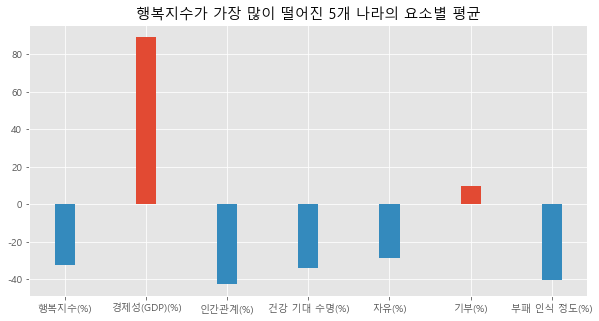

In [182]:
# 행복지수가 가장 많이 하락한 5개 국가의 행복결정요인별 평균 시각화
plt.figure(figsize=(10, 5))
plt.title(avg_compare_bottom5.columns[0])

plt.bar(list(avg_compare_bottom5.index), list(avg_compare_bottom5[avg_compare_bottom5.columns[0]]), width = bar_width, color=list(map(lambda x : red if x > 0 else blue, list(avg_compare_bottom5[avg_compare_bottom5.columns[0]]))))

plt.show()

# 3. 결론

## 3.1. 히트맵을 통한 행복지수와 행복결정요인별 상관관계 시각화

<AxesSubplot:>

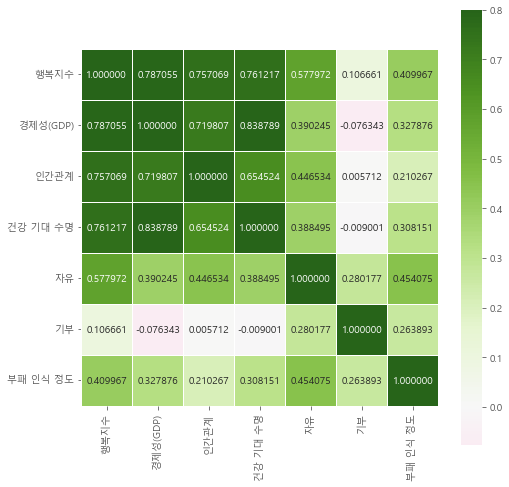

In [183]:
data_2015 = pd.read_csv("./data_dir/data2015.csv", encoding='cp949')
data_2016 = pd.read_csv("./data_dir/data2016.csv", encoding='cp949')
data_2017 = pd.read_csv("./data_dir/data2017.csv", encoding='cp949')
data_2018 = pd.read_csv("./data_dir/data2018.csv", encoding='cp949')
data_2019 = pd.read_csv("./data_dir/data2019.csv", encoding='cp949')
data_2020 = pd.read_csv("./data_dir/data2020.csv", encoding='cp949')
data_2021 = pd.read_csv("./data_dir/data2021.csv", encoding='cp949')
data_2022 = pd.read_csv("./data_dir/data2022.csv", encoding='cp949')


# 행복결정요인별 상관관계(히트맵)
# avg_data_2015_to_2022 = 
corrmat2015 = data_2015.corr()
corrmat2016 = data_2016.corr()
corrmat2017 = data_2017.corr()
corrmat2018 = data_2018.corr()
corrmat2019 = data_2019.corr()
corrmat2020 = data_2020.corr()
corrmat2021 = data_2021.corr()
corrmat2022 = data_2022.corr()

corrmat=(corrmat2015+corrmat2016+corrmat2017+corrmat2018+corrmat2019+corrmat2020+corrmat2021+corrmat2022)/8


sns.color_palette("Paired")
plt.figure(figsize = (8,8))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0, 
            annot=True, fmt='f', linewidths=.5)

# 초록색: A가 커지면 B도 커진다
# 분홍색: A가 커지면 B는 작아진다
# 초록색일 수록 해당 요소에 영향을 크게 미침

초록색일수록 해당 요소에 영향을 크게 미침
   
행복지수에 가장 영향을 많이 주는건 경제성(GDP)이다.

물론 경제성이 가장 영향을 주지만 인간관계, 건강 기대 수명도 많은 영향을 끼친다.

경제성(GDP) : 0.78 / 인간관계 : 0.75 / 건강 기대 수명 : 0.76

## 3.2. 느낀점

 행복을 느끼는 요인은 사람마다 다르다. 개개인으로 봤을 때는 먹는 것, 쇼핑, 애완동물 등 사소한 것에도 행복감을 느끼지만 사회적으로 봤을 때는 결국 가장 큰 요인을 무엇일까 궁금했다. 당연히 경제성(GDP)가 행복을 느끼는 가장 큰 요인이라 생각되었지만 결과를 보니 경제성(GDP)뿐만 아니라 인관관계, 건강 기대 수명도 영향을 많이 주었다. 행복 = 돈 이라는 고정관념이 깨지는 놀라운 결과였다.

 그리고 변화율 그래프에는 그당시 시대 상황이 잘 도드라져 보이는 것도 있고, 의외의 결과가 나온 것들도 있었다. 하나의 요인만 보는 것이 아닌 다방면으로 보아야 비로소 정확도와 신뢰도가 높은 분석을 할 수 있다는 것을 깨달았다.

 본 과제를 수행함으로써 스스로 깨닫고, 얻은 점은 틀에 갇힌 사고에서 벗어나 끊임없이 의심하고, 다양한 방향으로 생각하고 분석해야 한다는 것이다.